In [1]:
from pathlib import Path

Path("../../models/baseline").exists()

True

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../../data/preprocessed/layer1/matches_stats_data_1.csv')
df.head()

,hometeam,awayteam,date,season,round,gf,ga,h_xg,h_xga,h_standard sot,...,h_defence_rating,h_avg_age,a_strength_overall_away,a_overall_rating,a_attack_rating,a_midfield_rating,a_defence_rating,a_avg_age,soh,soa
0,CRY,SOU,2020-09-12,2020-2021,1,1.0,0.0,0.157143,0.128571,0.1875,...,0.266667,0.900963,0.202899,0.250000,0.333333,0.3750,0.333333,0.562586,0.353518,0.349016
1,FUL,ARS,2020-09-12,2020-2021,1,0.0,3.0,0.014286,0.271429,0.1250,...,0.200000,0.337001,0.637681,0.583333,0.666667,0.5000,0.533333,0.375516,0.353518,0.491616
2,LIV,LEE,2020-09-12,2020-2021,1,4.0,3.0,0.385714,0.042857,0.2500,...,0.600000,0.537827,0.405797,0.250000,0.388889,0.3125,0.266667,0.425034,0.514222,0.415563
3,WHU,NEW,2020-09-12,2020-2021,1,0.0,2.0,0.142857,0.228571,0.1875,...,0.400000,0.788171,0.115942,0.250000,0.333333,0.2500,0.200000,0.675378,0.494134,0.320495
4,TOT,EVE,2020-09-13,2020-2021,1,0.0,1.0,0.157143,0.171429,0.3125,...,0.666667,0.662999,0.289855,0.500000,0.555556,0.5000,0.600000,0.662999,0.453958,0.377536


In [7]:
df = df[df['season'] == '2023-2024']

In [16]:
df.columns.to_list()

['hometeam',
 'awayteam',
 'date',
 'season',
 'round',
 'gf',
 'ga',
 'h_xg',
 'h_xga',
 'h_standard sot',
 'h_kp',
 'h_xa',
 'h_poss_x',
 'h_touches att pen',
 'h_carries prgdist',
 'h_progressive passing dist',
 'h_tackles tklw',
 'h_challenges tkl%',
 'h_saves',
 'a_xg',
 'a_xga',
 'a_standard sot',
 'a_kp',
 'a_xa',
 'a_poss_x',
 'a_touches att pen',
 'a_carries prgdist',
 'a_progressive passing dist',
 'a_tackles tklw',
 'a_challenges tkl%',
 'a_saves',
 'b365h',
 'b365d',
 'b365a',
 'result_A',
 'result_D',
 'result_H',
 'h_strength_overall_home',
 'h_overall_rating',
 'h_attack_rating',
 'h_midfield_rating',
 'h_defence_rating',
 'h_avg_age',
 'a_strength_overall_away',
 'a_overall_rating',
 'a_attack_rating',
 'a_midfield_rating',
 'a_defence_rating',
 'a_avg_age',
 'soh',
 'soa',
 'prediction',
 'correct']

In [32]:
def predict_result(row):
    if abs(row['h_overall_rating'] - row['a_overall_rating']) <= 0.2:
        return 'D'  
    elif row['h_overall_rating'] > row['a_overall_rating']:
        return 'H'  
    else:
        return 'A'  

Accuracy: 0.521


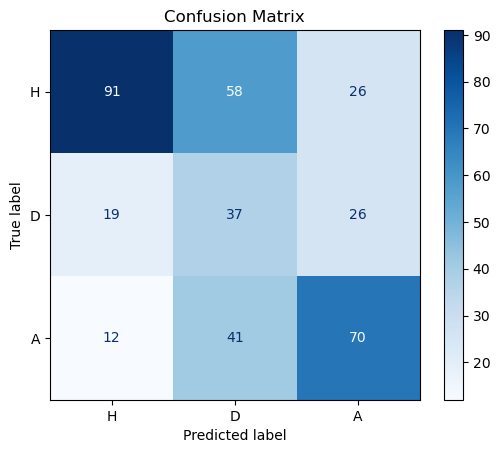

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

df['prediction'] = df.apply(predict_result, axis=1)
df['actual'] = df[['result_H', 'result_D', 'result_A']].idxmax(axis=1).str[-1]
accuracy = accuracy_score(df['actual'], df['prediction'])
print(f"Accuracy: {accuracy:.3f}")

cm = confusion_matrix(df['actual'], df['prediction'], labels=['H', 'D', 'A'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['H', 'D', 'A'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()